# importing Libraries

In [1]:
#basic
import pandas as pd
import numpy as np

#matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

#set maximum columns and rows
pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows',1000)

#plotly
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px
from plotly.subplots import make_subplots

#time
import time

#statmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor   

#model selection
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn import model_selection
from sklearn.model_selection import cross_val_predict #prediction
from mlxtend.evaluate import confusion_matrix
from sklearn.model_selection import GridSearchCV

#machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb

#ensemble
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier

#metrics
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

#pca
from sklearn.decomposition import PCA

#preprocessing
from sklearn.preprocessing import LabelEncoder,StandardScaler

#data_balance
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

#warnings
import warnings as warnings
warnings.filterwarnings("ignore")

# Reading the CSV file 

In [2]:
df=pd.read_csv("bank-additional-full.csv",sep=";")

In [3]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0           1.1          93.994          -36.4      4.857       5191.0  no  
1           1.1          93.994          -36.4      4.857       5191.0  no  
2           1.1          93.994          -36.4      4.857       5191.0  no  
3           1.1          93.994          -36.4      4.857       5191.0  no  
4           1.1          93.994          -36.4      4.857       5191.0  no

# Data Preprocessing 

In [4]:
df['month'].value_counts().index

Index(['may', 'jul', 'aug', 'jun', 'nov', 'apr', 'oct', 'sep', 'mar', 'dec'], dtype='object')

In [5]:
df['month']=df['month'].replace({'may':3, 'jul':5, 'aug':6, 'jun':4, 'nov':9, 'apr':2, 'oct':8, 'sep':7, 'mar':1, 'dec':10})

# DAY OF WEEK

In [6]:
df['day_of_week'].value_counts().index

Index(['thu', 'mon', 'wed', 'tue', 'fri'], dtype='object')

In [7]:
df['day_of_week']=df['day_of_week'].replace({'thu':4, 'mon':1, 'wed':3, 'tue':2, 'fri':5})

In [8]:
df_final=pd.get_dummies(data=df,columns=['job','marital','education','default','housing','loan','poutcome'],drop_first=True)

# TARGET

In [9]:
df_final['y'].replace({'no':0,'yes':1},inplace=True)

# CONTACT

In [10]:
df_final['contact'].replace({'cellular':1,'telephone':0},inplace=True)

## DROPPING "PDAYS" FEATURE BECAUSE PDAYS IS ZERO THE OUTCOME Y IS ALSO ZERO

In [11]:
df.drop('pdays',axis=1,inplace=True)

# Removing outlier Using Isolation forest

### Isolation Forest is similar in principle to Random Forest and is built on the basis of decision trees. Isolation Forest, however, identifies anomalies or outliers rather than profiling normal data points. Isolation Forest isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of that selected feature. This split depends on how long it takes to separate the points.

### Random partitioning produces noticeably shorter paths for anomalies. When a forest of random trees collectively produces shorter path lengths for particular samples, they are highly likely to be anomalies.

In [12]:
iso_forest = IsolationForest(n_estimators=300, contamination=0.10)

iso_forest = iso_forest.fit(df_final)

In [13]:
isof_outliers = iso_forest.predict(df_final)

In [14]:
isoF_outliers_values = df_final[iso_forest.predict(df_final) == -1]

## Anomalies in the Dataset

In [15]:
isoF_outliers_values

age  contact  month  day_of_week  duration  campaign  pdays  previous  \
29      55        0      3            1       362         1    999         0   
261     27        0      3            1       119         1    999         0   
388     28        0      3            2      1201         1    999         0   
470     42        0      3            2       529         1    999         0   
520     40        0      3            2       427         1    999         0   
...    ...      ...    ...          ...       ...       ...    ...       ...   
41179   64        1      9            5       151         3    999         0   
41182   29        1      9            5       112         1      9         1   
41183   73        1      9            5       334         1    999         0   
41186   44        1      9            5       442         1    999         0   
41187   74        1      9            5       239         3    999         1   

       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  \
29              1.1          93.994          -36.4      4.857       5191.0  0   
261             1.1          93.994          -36.4      4.857       5191.0  0   
388             1.1          93.994          -36.4      4.857       5191.0  1   
470             1.1          93.994          -36.4      4.857       5191.0  0   
520             1.1          93.994          -36.4      4.857       5191.0  0   
...             ...             ...            ...        ...          ... ..   
41179          -1.1          94.767          -50.8      1.028       4963.6  0   
41182          -1.1          94.767          -50.8      1.028       4963.6  0   
41183          -1.1          94.767          -50.8      1.028       4963.6  1   
41186          -1.1          94.767          -50.8      1.028       4963.6  1   
41187          -1.1          94.767          -50.8      1.028       4963.6  0   

       job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
29                   0                 0              0               0   
261                  1                 0              0               0   
388                  0                 0              0               0   
470                  0                 0              0               0   
520                  0                 0              0               1   
...                ...               ...            ...             ...   
41179                0                 0              0               0   
41182                0                 0              0               0   
41183                0                 0              0               0   
41186                0                 0              0               0   
41187                0                 0              0               0   

       job_retired  job_self-employed  job_services  job_student  \
29               0                  0             0            0   
261              0                  0             0            0   
388              0                  0             0            0   
470              0                  0             0            0   
520              0                  0             0            0   
...            ...                ...           ...          ...   
41179            1                  0             0            0   
41182            0                  0             0            0   
41183            1                  0             0            0   
41186            0                  0             0            0   
41187            1                  0             0            0   

       job_technician  job_unemployed  job_unknown  marital_married  \
29                  0               0            1                1   
261                 0               0            0                0   
388                 0               0            1                0   
470                 1               0            0                0   


# Dropping the anomalies

In [16]:
df_final_1=df_final.drop(isoF_outliers_values.index.values.tolist())

# Base Machine learning models (UnBalanced Dataset)

### SCALING FEATURES BEFORE BUILDING THE MODEL

In [17]:
sc=StandardScaler()
X=df_final_1.drop('y',axis=1)
X=pd.DataFrame(sc.fit_transform(X.values),columns=X.columns,index=X.index)
y=df_final_1['y']

X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size=0.3, random_state=42)

# FUNCTION TO PLOT ROC_AUC CURVE

In [18]:
def plot_roc_curve(fper, tper,roc_auc):  
    plt.plot(fper, tper, color='orange',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

In [19]:
result_0=(y_Train.value_counts()[0]/len(y_Train))*100
result_1=(y_Train.value_counts()[1]/len(y_Train))*100

# DataSet imbalance 

In [20]:
labels = ['0-no','1-yes']
values = [result_0,result_1]

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text='Percentage of 0 and 1 in the y column')
fig.show()

# model results function 

In [21]:
def model_results(X,y,performCV=True,visual=True,cv_folds=5):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    classifiers = [
    LogisticRegression(random_state=42),
    KNeighborsClassifier(),
    GaussianNB(),
    DecisionTreeClassifier(criterion='entropy',random_state=42),
    DecisionTreeClassifier(criterion='gini',random_state=42),
    RandomForestClassifier(random_state=42),
    BaggingClassifier(random_state=42),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42)
    ]
    
    results = []
    accuracy_train=[]
    accuracy_test=[]
    precision=[]
    f1_s=[]
    roc_ac_score=[]
    recall=[]
    
    for item in classifiers:
        print(item,"\n")
        clf = item
        clf.fit(X_train, y_train)
        y_pred=clf.predict(X_test)
        #METRICS
        #train
        print("accuracy train:",clf.score(X_train,y_train),"\n")
        #test
        print("accuracy test:",clf.score(X_test,y_test),"\n")
        #precision
        print("precision :",precision_score(y_test,y_pred),"\n")
        #f1-score
        print("f1 score:",f1_score(y_test,y_pred),"\n")
        #ROC-AUC
        print("roc_auc_score",roc_auc_score(y_test,y_pred),"\n")
        
        #Append values
        accuracy_train.append(clf.score(X_train,y_train))
        accuracy_test.append(clf.score(X_test,y_test))
        precision.append(precision_score(y_test,y_pred))
        recall.append(recall_score(y_test,y_pred))
        f1_s.append(f1_score(y_test,y_pred))
        roc_ac_score.append(roc_auc_score(y_test,y_pred))
        
        #CONFUSION MATRIX
        fig,ax= plt.subplots()
        fig.set_size_inches(4, 4)
        sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap = 'RdBu_r')
        bottom, top = ax.get_ylim()
        ax.set_xlabel("predicted")
        ax.set_ylabel("Actual")
        ax.set_ylim(bottom + 0.5, top - 0.5)
        plt.show()
        #roc auc curve
        fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
        roc_auc = metrics.auc(fpr, tpr)
        plot_roc_curve(fpr, tpr,roc_auc)
        print("-------------------------------------------------------------------------------------------------------")
#--------------------------------------------------------------------------------------------------------------------------
    #train-test visualisation:
    models_TT=['LOGISTIC REGRESSION','KNN','NAVIES BAYES','DECISION TREE ENTROPY','DECISION TREE GINI','RANDOM FOREST'
        ,'BAGGING CLASSIFIER','ADABOOST CLASSIFIER','GRADIENTBOOST CLASSIFIER']
    if visual:
        result_scores=pd.DataFrame({'NAME':models_TT,'accuracy_train':accuracy_train,'accuracy_test':accuracy_test,'precision':precision,'Recall':recall,'roc_ac':roc_ac_score,'f1-score':f1_s})
        result_scores=result_scores.round(decimals=2)
        print(result_scores)

        fig = go.Figure(data=[
        go.Bar(name='Train Accuracy', x=models_TT, y=result_scores.accuracy_train,text=result_scores.accuracy_train,textposition='auto'),
        go.Bar(name='Test Accuracy', x=models_TT, y=result_scores.accuracy_test,text=result_scores.accuracy_test,textposition='auto')
        ])
        # Change the bar mode
        fig.update_layout(barmode='group')
        fig.show()
#--------------------------------------------------------------------------------------------------------------------------    
    if performCV:
        print("cross validation scores")   
        #CROSS-VALIDATION
        models=[]
        models.append(('LR', LogisticRegression(random_state=42)))
        models.append(('KNN', KNeighborsClassifier()))
        models.append(('CART1', DecisionTreeClassifier(criterion='entropy',random_state=42)))
        models.append(('CART2', DecisionTreeClassifier(criterion='gini',random_state=42)))
        models.append(('NB', GaussianNB()))
        models.append(('RF', RandomForestClassifier(random_state=42)))
        models.append(('BGC', BaggingClassifier(random_state=42)))
        models.append(('ABC', AdaBoostClassifier(random_state=42)))
        models.append(('GBC', GradientBoostingClassifier(random_state=42)))


        results_cross = []
        accuracy_cross=[]
        names_cross = []
        bias=[]
        variance=[]
        for name,model in models:
            kf  = model_selection.KFold(shuffle=True,n_splits=cv_folds,random_state=0)
            cv_results =model_selection.cross_val_score(model,X,y,cv=kf,scoring='roc_auc')
            #print(cv_results)
            results_cross.append(cv_results)
            names_cross.append(name)
            bias.append(1-np.mean(cv_results))
            variance.append(np.var(cv_results,ddof=1))
            accuracy_cross.append(np.mean(cv_results))
            #print("%s: %f (%f)" % (name, np.mean(cv_results),np.var(cv_results,ddof=1)))
            print()
            print('ACCURACY SCORE:',name,':',np.mean(cv_results))
            print('BIAS ERROR OF',name,':',1-np.mean(cv_results))
            print('VARIANCE ERROR OF',name,':',np.var(cv_results,ddof=1))
            print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_results),np.std(cv_results),np.min(cv_results),np.max(cv_results)))
            print('------------------------------------------------------------------------------------------------------------')
        
#--------------------------------------------------------------------------------------------------------------------------    
    #cross validation visulation:
    if performCV:
        if visual:
            result_scores1=pd.DataFrame({'NAME':models_TT,'Accuracy':accuracy_cross,'BIAS_ERROR':bias,'VARIANCE_ERROR':variance})
            print(result_scores1)

            result_scores1=result_scores1.round(decimals=2)
            fig = go.Figure(data=[
            go.Bar(name='Accuracy', x=result_scores1.NAME, y=result_scores1.Accuracy,text=result_scores1.Accuracy,textposition='auto'),
            go.Bar(name='Bias Error', x=result_scores1.NAME, y=result_scores1.BIAS_ERROR,text=result_scores1.BIAS_ERROR,textposition='auto')
            ])
            # Change the bar mode
            fig.update_layout(barmode='group')
            fig.show()     

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) 

accuracy train: 0.9349082780946508 

accuracy test: 0.9304019422713785 

precision : 0.528125 

f1 score: 0.3039568345323741 

roc_auc_score 0.5993824022977378 



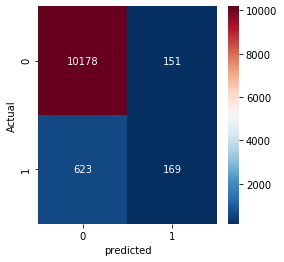

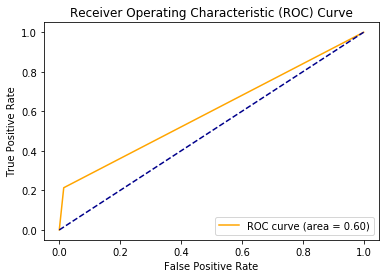

-------------------------------------------------------------------------------------------------------
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') 

accuracy train: 0.9451595498689687 

accuracy test: 0.9266253034799029 

precision : 0.4597315436241611 

f1 score: 0.25137614678899084 

roc_auc_score 0.5786963081292155 



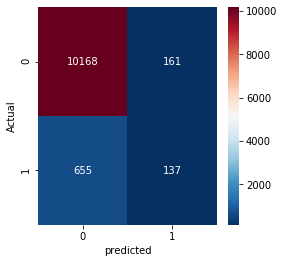

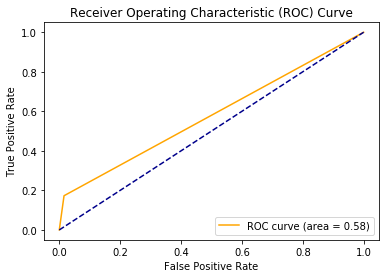

-------------------------------------------------------------------------------------------------------
GaussianNB(priors=None, var_smoothing=1e-09) 

accuracy train: 0.09280098658856174 

accuracy test: 0.0927074903336031 

precision : 0.07246643369505242 

f1 score: 0.13509343391050918 

roc_auc_score 0.509237744860748 



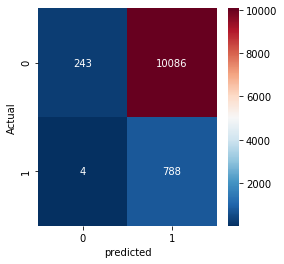

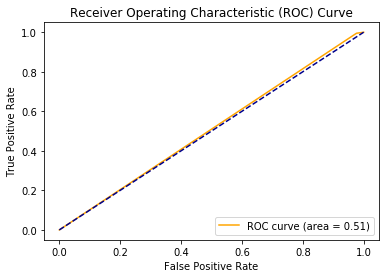

-------------------------------------------------------------------------------------------------------
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best') 

accuracy train: 1.0 

accuracy test: 0.9136768276234152 

precision : 0.39552238805970147 

f1 score: 0.39849624060150374 

roc_auc_score 0.6772315809855746 



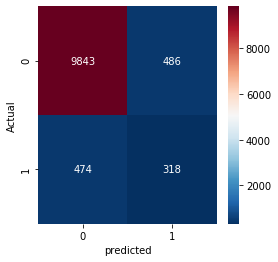

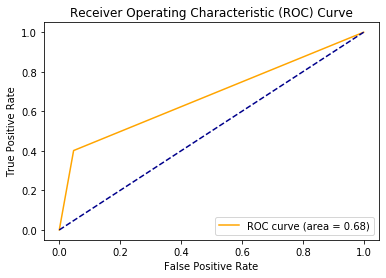

-------------------------------------------------------------------------------------------------------
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best') 

accuracy train: 1.0 

accuracy test: 0.9120582681413542 

precision : 0.38795180722891565 

f1 score: 0.39704069050554874 

roc_auc_score 0.6786918707845225 



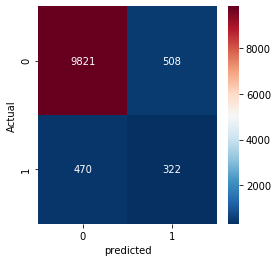

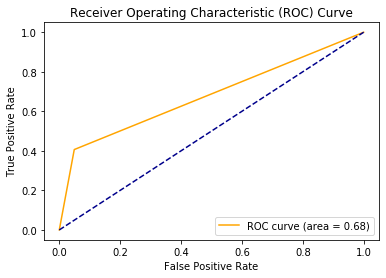

-------------------------------------------------------------------------------------------------------
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False) 

accuracy train: 0.993872360104825 

accuracy test: 0.9319305817822139 

precision : 0.5507246376811594 

f1 score: 0.33421284080914687 

roc_auc_score 0.6124463484687126 



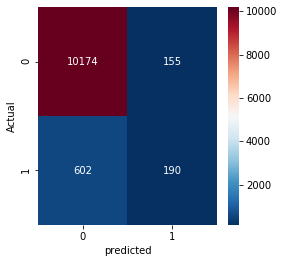

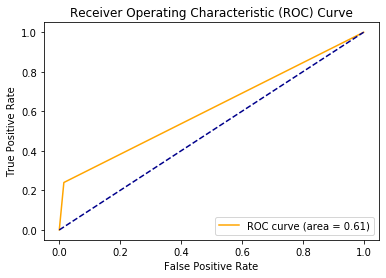

-------------------------------------------------------------------------------------------------------
BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=42, verbose=0,
                  warm_start=False) 

accuracy train: 0.9941806690303684 

accuracy test: 0.9305817822138297 

precision : 0.5206611570247934 

f1 score: 0.3949843260188088 

roc_auc_score 0.6478603930680608 



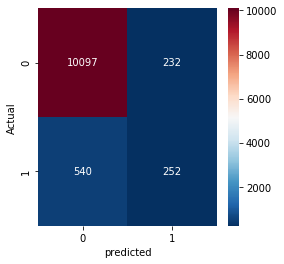

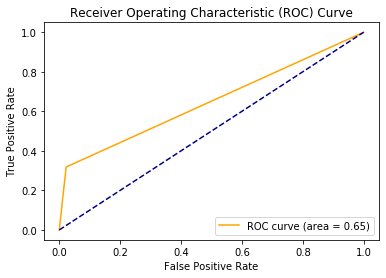

-------------------------------------------------------------------------------------------------------
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=42) 

accuracy train: 0.933829196855249 

accuracy test: 0.9298624224440248 

precision : 0.5147783251231527 

f1 score: 0.34891485809682804 

roc_auc_score 0.6224081873043534 



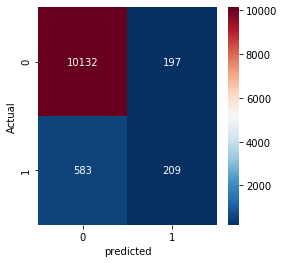

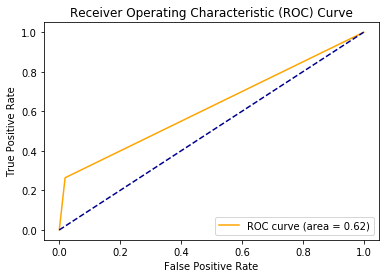

-------------------------------------------------------------------------------------------------------
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) 

accuracy train: 0.9441190072452598 

accuracy test: 0.9323801816383419 

precision : 0.5432900432900433 

f1 score: 0.4003189792663477 

roc_auc_score 0.6482456352664021 



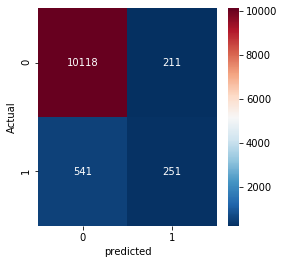

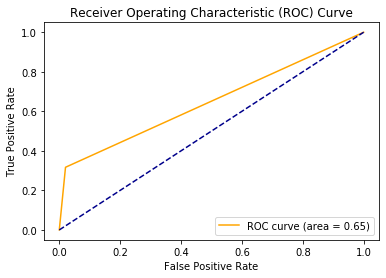

-------------------------------------------------------------------------------------------------------
                       NAME  accuracy_train  accuracy_test  precision  Recall  \
0       LOGISTIC REGRESSION            0.93           0.93       0.53    0.21   
1                       KNN            0.95           0.93       0.46    0.17   
2              NAVIES BAYES            0.09           0.09       0.07    0.99   
3     DECISION TREE ENTROPY            1.00           0.91       0.40    0.40   
4        DECISION TREE GINI            1.00           0.91       0.39    0.41   
5             RANDOM FOREST            0.99           0.93       0.55    0.24   
6        BAGGING CLASSIFIER            0.99           0.93       0.52    0.32   
7       ADABOOST CLASSIFIER            0.93           0.93       0.51    0.26   
8  GRADIENTBOOST CLASSIFIER            0.94           0.93       0.54    0.32   

   roc_ac  f1-score  
0    0.60      0.30  
1    0.58      0.25  
2    0.51      0.14

cross validation scores

ACCURACY SCORE: LR : 0.9211972279522609
BIAS ERROR OF LR : 0.07880277204773911
VARIANCE ERROR OF LR : 5.438393600240466e-06
CV Score : Mean - 0.9211972 | Std - 0.002085837 | Min - 0.9181505 | Max - 0.9240138
------------------------------------------------------------------------------------------------------------

ACCURACY SCORE: KNN : 0.7890019508854542
BIAS ERROR OF KNN : 0.21099804911454578
VARIANCE ERROR OF KNN : 4.442059473957296e-05
CV Score : Mean - 0.789002 | Std - 0.005961248 | Min - 0.7810495 | Max - 0.7974802
------------------------------------------------------------------------------------------------------------

ACCURACY SCORE: CART1 : 0.6849242723321735
BIAS ERROR OF CART1 : 0.31507572766782654
VARIANCE ERROR OF CART1 : 7.814014021842439e-05
CV Score : Mean - 0.6849243 | Std - 0.00790646 | Min - 0.6721345 | Max - 0.695819
------------------------------------------------------------------------------------------------------------

ACCURACY SCO

In [22]:
model_results(X,y)

### FROM THE ABOVE RESULTS THE BEST MODEL IS GRADIENTBOOST CLASSIFIER BECAUSE IT HAS GOOD GENERALIZATION IN TERMS OF TRAIN AND TEST ACCURACY. AND THE MODEL ALSO HAVE LOW BIAS AND LOW VARIANCE(GOOD BIAS AND VARIANCE TRADE OFF) AND THE MODEL HAS GOT LOW RECALL SCORE DUE TO DATA IMBALANCE IN TARGET COLUMN.SO FURTHER DATA IMBALANCE CAN BE SOLVED USING OVER SAMPLING TECHNIQUES.

# TARGET CLASS DATA IMBALANCE IS SOLVED USING SYNTHETIC MINORITY OVERSAMPLING TECHNIQUE

# after balancing using SMOTE

In [23]:
sc=StandardScaler()
X=df_final_1.drop('y',axis=1)
X=pd.DataFrame(sc.fit_transform(X.values),columns=X.columns,index=X.index)
y=df_final_1['y']

X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
smt = SMOTE()
X_smote, y_smote = smt.fit_sample(X_Train, y_Train)

In [25]:
result_0=(pd.Series(y_smote).value_counts()[0]/len(y_smote))*100
result_1=(pd.Series(y_smote).value_counts()[1]/len(y_smote))*100

labels = ['0-no','1-yes']
values = [result_0,result_1]

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text='Percentage of 0 and 1 in the y column')
fig.show()

In [26]:
X_smote=pd.DataFrame(X_smote,columns=X_Train.columns)
y_smote=pd.DataFrame(y_smote,columns=['y'])

In [27]:
df_smote=pd.concat([X_smote,y_smote],axis=1)

In [28]:
df_smote.head()

age   contact     month  day_of_week  duration  campaign     pdays  \
0  0.340828 -1.263205  0.257280    -0.693047  0.452076 -0.573038  0.017995   
1 -0.493020 -1.263205  0.771826     0.017796 -0.937112 -0.573038  0.017995   
2 -0.909944 -1.263205 -0.771812     1.439481 -0.880245  2.289999  0.017995   
3 -0.701482 -1.263205 -0.257266     1.439481  0.699855 -0.215158  0.017995   
4  0.340828  0.791637  0.257280    -1.403890 -0.908679  0.142721  0.017995   

   previous  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0 -0.286381      0.765790        0.564112      -0.456093   0.683006   
1 -0.286381     -1.382079        0.765177       0.588749  -1.848410   
2 -0.286381     -1.451365       -1.326644      -1.287218  -1.624225   
3 -0.286381      0.765790        1.573129      -0.242376   0.690479   
4 -0.286381      0.765790        0.564112      -0.456093   0.686120   

   nr.employed  job_blue-collar  job_entrepreneur  job_housemaid  \
0     0.804451        -0.556857         -0.189040      -0.158103   
1    -3.068729        -0.556857          5.289877      -0.158103   
2    -1.308193        -0.556857         -0.189040      -0.158103   
3     0.804451         1.795792         -0.189040      -0.158103   
4     0.804451         1.795792         -0.189040      -0.158103   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0       -0.277306    -0.177643           -0.18735     -0.332689    -0.108078   
1       -0.277306    -0.177643           -0.18735     -0.332689    -0.108078   
2       -0.277306    -0.177643           -0.18735      3.005815    -0.108078   
3       -0.277306    -0.177643           -0.18735     -0.332689    -0.108078   
4       -0.277306    -0.177643           -0.18735     -0.332689    -0.108078   

   job_technician  job_unemployed  job_unknown  marital_married  \
0        2.260963       -0.150872    -0.087084        -1.271736   
1       -0.442289       -0.150872    -0.087084         0.786327   
2       -0.442289       -0.150872    -0.087084        -1.271736   
3       -0.442289       -0.150872    -0.087084         0.786327   
4       -0.442289       -0.150872    -0.087084         0.786327   

   marital_single  marital_unknown  education_basic.6y  education_basic.9y  \
0        1.650350        -0.041911           -0.242262           -0.421978   
1       -0.605932        -0.041911           -0.242262            2.369793   
2        1.650350        -0.041911           -0.242262           -0.421978   
3       -0.605932        -0.041911           -0.242262           -0.421978   
4       -0.605932        -0.041911           -0.242262            2.369793   

   education_high.school  education_illiterate  education_professional.course  \
0              -0.553365              -0.02078                       2.685518   
1              -0.553365              -0.02078                      -0.372368   
2               1.807127              -0.02078                      -0.372368   
3              -0.553365              -0.02078                      -0.372368   
4              -0.553365              -0.02078                      -0.372368   

   education_university.degree  education_unknown  default_unknown  \
0                     -0.65122          -0.191097        -0.526608   
1                     -0.65122          -0.191097        -0.526608   
2                     -0.65122          -0.191097        -0.526608   
3                     -0.65122          -0.191097         1.898944   
4                     -0.65122          -0.191097         1.898944   

   default_yes  housing_unknown  housing_yes  loan_unknown  loan_yes  \
0    -0.008996        -0.111848     0.944432     -0.111848  2.421962   
1    -0.008996        -0.111848     0.944432     -0.111848 -0.412888   
2    -0.008996        -0.111848     0.944432     -0.111848 -0.412888   
3    -0.008996        -0.111848    -1.058838     -0.111848 -0.412888   
4    -0.008996        -0.111848     0.944432     -0.111848 -0.412888   

   poutco

In [29]:
X=df_smote.drop('y',axis=1)
y=df_smote['y']

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) 

accuracy train: 0.8799739459971577 

accuracy test: 0.884567560099475 

precision : 0.875234019791388 

f1 score: 0.886796287514396 

roc_auc_score 0.8844793457657575 



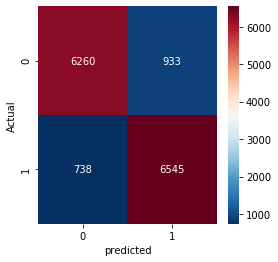

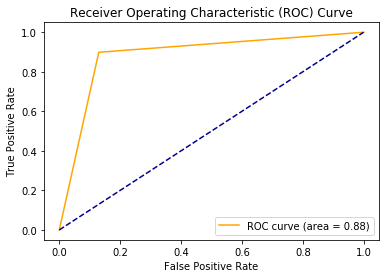

-------------------------------------------------------------------------------------------------------
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') 

accuracy train: 0.9502901468498341 

accuracy test: 0.9342359767891683 

precision : 0.8857073230169368 

f1 score: 0.9385409941897999 

roc_auc_score 0.9338365776191817 



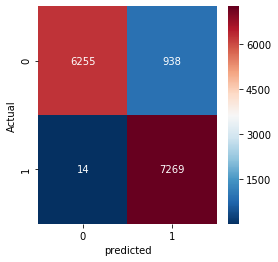

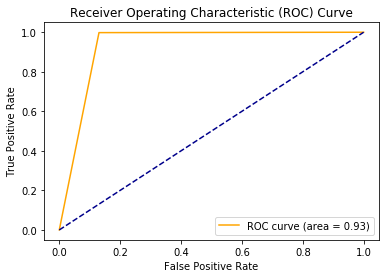

-------------------------------------------------------------------------------------------------------
GaussianNB(priors=None, var_smoothing=1e-09) 

accuracy train: 0.5305838465182378 

accuracy test: 0.5338491295938105 

precision : 0.5191605185874937 

f1 score: 0.6823573714931276 

roc_auc_score 0.5309629163126561 



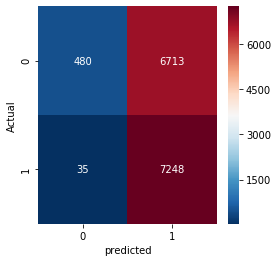

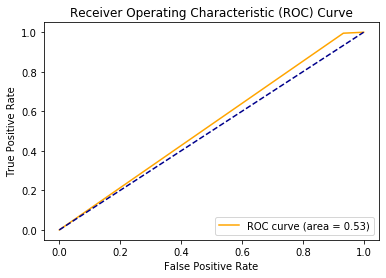

-------------------------------------------------------------------------------------------------------
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best') 

accuracy train: 1.0 

accuracy test: 0.9425255595468361 

precision : 0.9396210985416382 

f1 score: 0.9430916552667578 

roc_auc_score 0.9425001449320485 



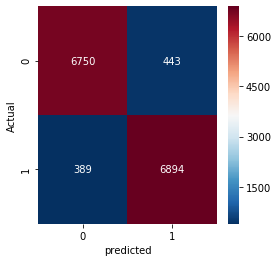

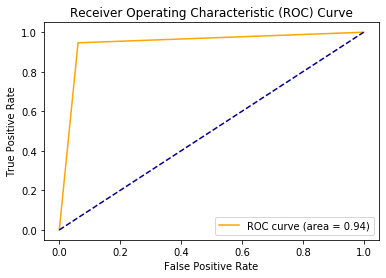

-------------------------------------------------------------------------------------------------------
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best') 

accuracy train: 1.0 

accuracy test: 0.9396242055816524 

precision : 0.9352166236588347 

f1 score: 0.9403250034139015 

roc_auc_score 0.9395875118415258 



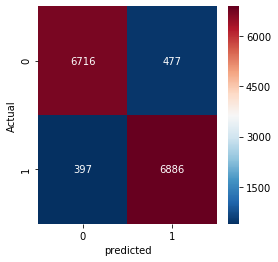

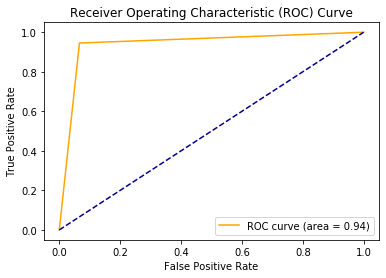

-------------------------------------------------------------------------------------------------------
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False) 

accuracy train: 0.9982531975367125 

accuracy test: 0.9646311135672838 

precision : 0.962058141121878 

f1 score: 0.9649555099247091 

roc_auc_score 0.9646108484305886 



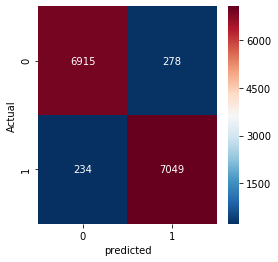

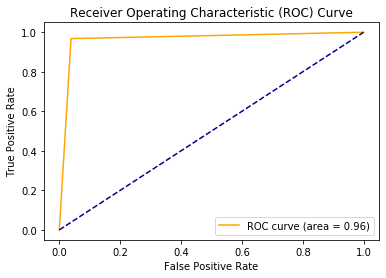

-------------------------------------------------------------------------------------------------------
BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=42, verbose=0,
                  warm_start=False) 

accuracy train: 0.9977202747513026 

accuracy test: 0.9578612876485217 

precision : 0.951183231913455 

f1 score: 0.958441204523777 

roc_auc_score 0.9578115548934357 



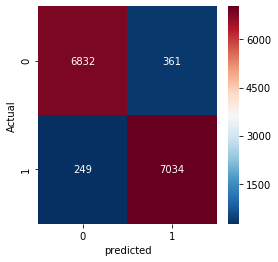

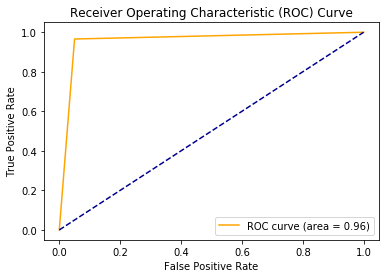

-------------------------------------------------------------------------------------------------------
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=42) 

accuracy train: 0.9297134059687352 

accuracy test: 0.9334070185134015 

precision : 0.9291049843813662 

f1 score: 0.9341799808821522 

roc_auc_score 0.9333700844484735 



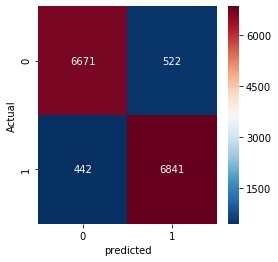

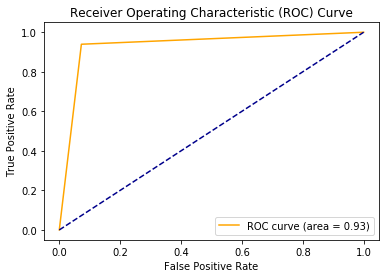

-------------------------------------------------------------------------------------------------------
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) 

accuracy train: 0.950823069635244 

accuracy test: 0.9514368610113291 

precision : 0.9348400740153318 

f1 score: 0.9526567445619234 

roc_auc_score 0.9513134355931616 



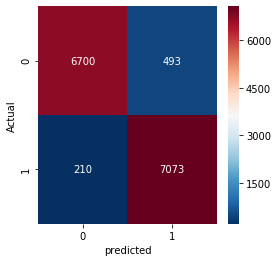

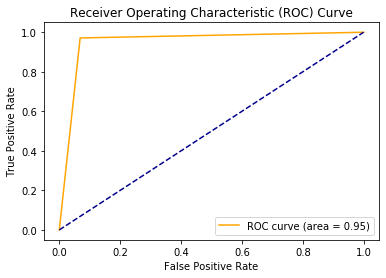

-------------------------------------------------------------------------------------------------------
                       NAME  accuracy_train  accuracy_test  precision  Recall  \
0       LOGISTIC REGRESSION            0.88           0.88       0.88    0.90   
1                       KNN            0.95           0.93       0.89    1.00   
2              NAVIES BAYES            0.53           0.53       0.52    1.00   
3     DECISION TREE ENTROPY            1.00           0.94       0.94    0.95   
4        DECISION TREE GINI            1.00           0.94       0.94    0.95   
5             RANDOM FOREST            1.00           0.96       0.96    0.97   
6        BAGGING CLASSIFIER            1.00           0.96       0.95    0.97   
7       ADABOOST CLASSIFIER            0.93           0.93       0.93    0.94   
8  GRADIENTBOOST CLASSIFIER            0.95           0.95       0.93    0.97   

   roc_ac  f1-score  
0    0.88      0.89  
1    0.93      0.94  
2    0.53      0.68

cross validation scores

ACCURACY SCORE: LR : 0.9402797513551062
BIAS ERROR OF LR : 0.05972024864489378
VARIANCE ERROR OF LR : 1.5548709752061064e-06
CV Score : Mean - 0.9402798 | Std - 0.001115301 | Min - 0.9386282 | Max - 0.941508
------------------------------------------------------------------------------------------------------------

ACCURACY SCORE: KNN : 0.9754364589772736
BIAS ERROR OF KNN : 0.0245635410227264
VARIANCE ERROR OF KNN : 4.3225593872709735e-06
CV Score : Mean - 0.9754365 | Std - 0.001859583 | Min - 0.9726573 | Max - 0.9781959
------------------------------------------------------------------------------------------------------------

ACCURACY SCORE: CART1 : 0.9461566967577273
BIAS ERROR OF CART1 : 0.05384330324227271
VARIANCE ERROR OF CART1 : 9.62838505732135e-06
CV Score : Mean - 0.9461567 | Std - 0.002775375 | Min - 0.9426177 | Max - 0.9497213
------------------------------------------------------------------------------------------------------------

ACCURACY S

In [30]:
model_results(X,y)

# CHOOSING BEST MODEL AFTER  SMOTE: RANDOM FOREST CLASSIFIER

# RANDOM FOREST MODEL HAS GOOD GENERALIZATION INTERMS OF TRAIN AND TEST ACCURACY

In [31]:
rf=RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
y_pred=rf.predict(X_Test)

In [33]:
#METRICS
print("accuracy:",accuracy_score(y_Test,y_pred),"\n")
#precision
print("precision :",precision_score(y_Test,y_pred),"\n")
#Recall
print("Recall :",recall_score(y_Test,y_pred),"\n")
print("f1 score:",f1_score(y_Test,y_pred),"\n")
#roc_auc score
print("roc_auc_score",roc_auc_score(y_Test,y_pred),"\n")

accuracy: 0.9313011419836346 

precision : 0.5221518987341772 

Recall : 0.4166666666666667 

f1 score: 0.4634831460674158 

roc_auc_score 0.6937142995449704 



# RANDOM OVER SAMPLING

In [34]:
sc=StandardScaler()
X=df_final_1.drop('y',axis=1)
X=pd.DataFrame(sc.fit_transform(X.values),columns=X.columns,index=X.index)
y=df_final_1['y']

X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
# random oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_Train, y_Train)

# using Counter to display results of naive oversampling
from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(0, 24126), (1, 24126)]


In [36]:
result_0=(pd.Series(y_resampled).value_counts()[0]/len(y_resampled))*100
result_1=(pd.Series(y_resampled).value_counts()[1]/len(y_resampled))*100
labels = ['0-no','1-yes']
values = [result_0,result_1]
# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text='Percentage of 0 and 1 in the y column')
fig.show()

In [37]:
X_over=pd.DataFrame(X_resampled,columns=X_Train.columns)
y_over=pd.DataFrame(y_resampled,columns=['y'])

In [38]:
df_over=pd.concat([X_over,y_over],axis=1)

In [39]:
df_over.head()

age   contact     month  day_of_week  duration  campaign     pdays  \
0  0.340828 -1.263205  0.257280    -0.693047  0.452076 -0.573038  0.017995   
1 -0.493020 -1.263205  0.771826     0.017796 -0.937112 -0.573038  0.017995   
2 -0.909944 -1.263205 -0.771812     1.439481 -0.880245  2.289999  0.017995   
3 -0.701482 -1.263205 -0.257266     1.439481  0.699855 -0.215158  0.017995   
4  0.340828  0.791637  0.257280    -1.403890 -0.908679  0.142721  0.017995   

   previous  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0 -0.286381      0.765790        0.564112      -0.456093   0.683006   
1 -0.286381     -1.382079        0.765177       0.588749  -1.848410   
2 -0.286381     -1.451365       -1.326644      -1.287218  -1.624225   
3 -0.286381      0.765790        1.573129      -0.242376   0.690479   
4 -0.286381      0.765790        0.564112      -0.456093   0.686120   

   nr.employed  job_blue-collar  job_entrepreneur  job_housemaid  \
0     0.804451        -0.556857         -0.189040      -0.158103   
1    -3.068729        -0.556857          5.289877      -0.158103   
2    -1.308193        -0.556857         -0.189040      -0.158103   
3     0.804451         1.795792         -0.189040      -0.158103   
4     0.804451         1.795792         -0.189040      -0.158103   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0       -0.277306    -0.177643           -0.18735     -0.332689    -0.108078   
1       -0.277306    -0.177643           -0.18735     -0.332689    -0.108078   
2       -0.277306    -0.177643           -0.18735      3.005815    -0.108078   
3       -0.277306    -0.177643           -0.18735     -0.332689    -0.108078   
4       -0.277306    -0.177643           -0.18735     -0.332689    -0.108078   

   job_technician  job_unemployed  job_unknown  marital_married  \
0        2.260963       -0.150872    -0.087084        -1.271736   
1       -0.442289       -0.150872    -0.087084         0.786327   
2       -0.442289       -0.150872    -0.087084        -1.271736   
3       -0.442289       -0.150872    -0.087084         0.786327   
4       -0.442289       -0.150872    -0.087084         0.786327   

   marital_single  marital_unknown  education_basic.6y  education_basic.9y  \
0        1.650350        -0.041911           -0.242262           -0.421978   
1       -0.605932        -0.041911           -0.242262            2.369793   
2        1.650350        -0.041911           -0.242262           -0.421978   
3       -0.605932        -0.041911           -0.242262           -0.421978   
4       -0.605932        -0.041911           -0.242262            2.369793   

   education_high.school  education_illiterate  education_professional.course  \
0              -0.553365              -0.02078                       2.685518   
1              -0.553365              -0.02078                      -0.372368   
2               1.807127              -0.02078                      -0.372368   
3              -0.553365              -0.02078                      -0.372368   
4              -0.553365              -0.02078                      -0.372368   

   education_university.degree  education_unknown  default_unknown  \
0                     -0.65122          -0.191097        -0.526608   
1                     -0.65122          -0.191097        -0.526608   
2                     -0.65122          -0.191097        -0.526608   
3                     -0.65122          -0.191097         1.898944   
4                     -0.65122          -0.191097         1.898944   

   default_yes  housing_unknown  housing_yes  loan_unknown  loan_yes  \
0    -0.008996        -0.111848     0.944432     -0.111848  2.421962   
1    -0.008996        -0.111848     0.944432     -0.111848 -0.412888   
2    -0.008996        -0.111848     0.944432     -0.111848 -0.412888   
3    -0.008996        -0.111848    -1.058838     -0.111848 -0.412888   
4    -0.008996        -0.111848     0.944432     -0.111848 -0.412888   

   poutco

In [40]:
X=df_smote.drop('y',axis=1)
y=df_smote['y']

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) 

accuracy train: 0.8799739459971577 

accuracy test: 0.884567560099475 

precision : 0.875234019791388 

f1 score: 0.886796287514396 

roc_auc_score 0.8844793457657575 



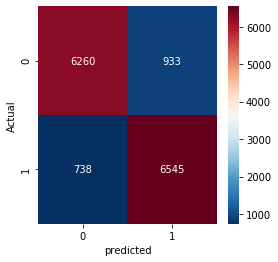

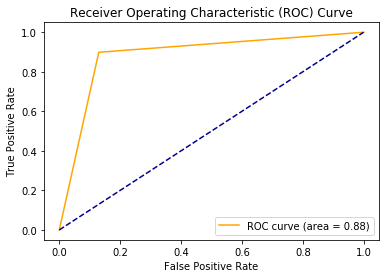

-------------------------------------------------------------------------------------------------------
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') 

accuracy train: 0.9502901468498341 

accuracy test: 0.9342359767891683 

precision : 0.8857073230169368 

f1 score: 0.9385409941897999 

roc_auc_score 0.9338365776191817 



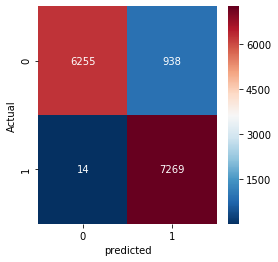

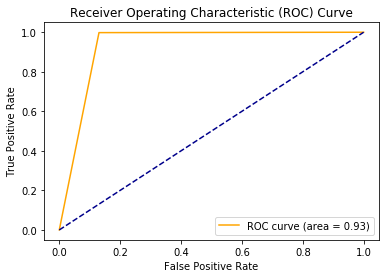

-------------------------------------------------------------------------------------------------------
GaussianNB(priors=None, var_smoothing=1e-09) 

accuracy train: 0.5305838465182378 

accuracy test: 0.5338491295938105 

precision : 0.5191605185874937 

f1 score: 0.6823573714931276 

roc_auc_score 0.5309629163126561 



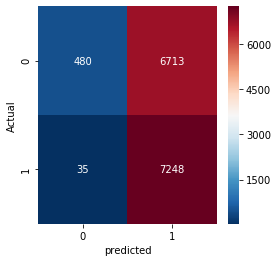

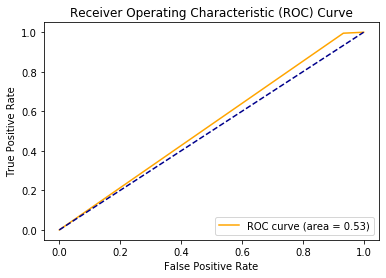

-------------------------------------------------------------------------------------------------------
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best') 

accuracy train: 1.0 

accuracy test: 0.9425255595468361 

precision : 0.9396210985416382 

f1 score: 0.9430916552667578 

roc_auc_score 0.9425001449320485 



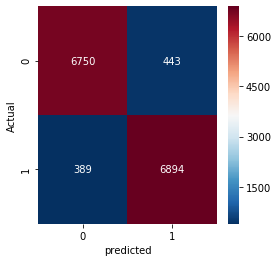

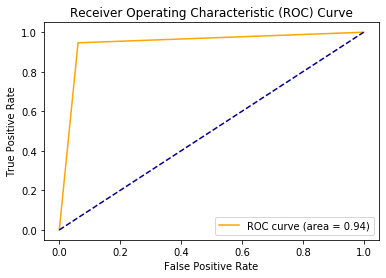

-------------------------------------------------------------------------------------------------------
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best') 

accuracy train: 1.0 

accuracy test: 0.9396242055816524 

precision : 0.9352166236588347 

f1 score: 0.9403250034139015 

roc_auc_score 0.9395875118415258 



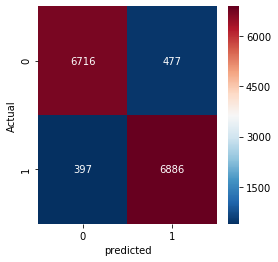

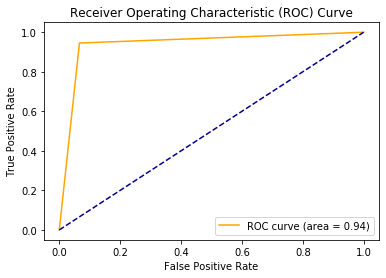

-------------------------------------------------------------------------------------------------------
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False) 

accuracy train: 0.9982531975367125 

accuracy test: 0.9646311135672838 

precision : 0.962058141121878 

f1 score: 0.9649555099247091 

roc_auc_score 0.9646108484305886 



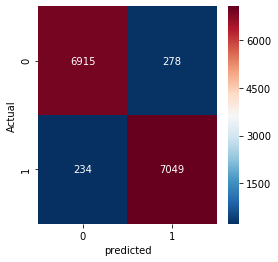

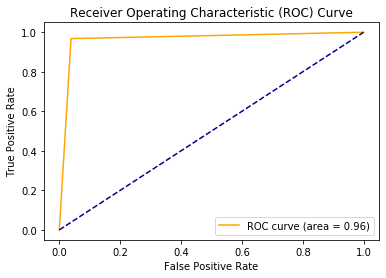

-------------------------------------------------------------------------------------------------------
BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=42, verbose=0,
                  warm_start=False) 

accuracy train: 0.9977202747513026 

accuracy test: 0.9578612876485217 

precision : 0.951183231913455 

f1 score: 0.958441204523777 

roc_auc_score 0.9578115548934357 



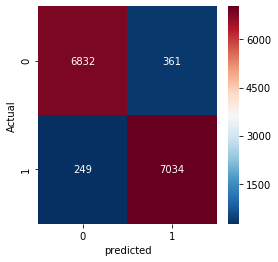

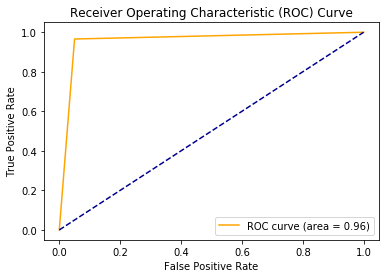

-------------------------------------------------------------------------------------------------------
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=42) 

accuracy train: 0.9297134059687352 

accuracy test: 0.9334070185134015 

precision : 0.9291049843813662 

f1 score: 0.9341799808821522 

roc_auc_score 0.9333700844484735 



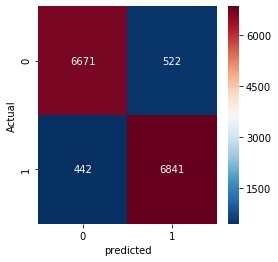

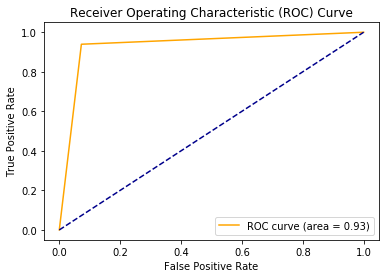

-------------------------------------------------------------------------------------------------------
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) 

accuracy train: 0.950823069635244 

accuracy test: 0.9514368610113291 

precision : 0.9348400740153318 

f1 score: 0.9526567445619234 

roc_auc_score 0.9513134355931616 



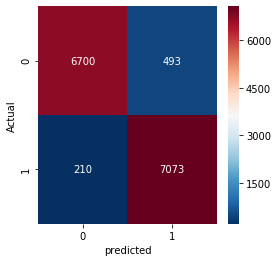

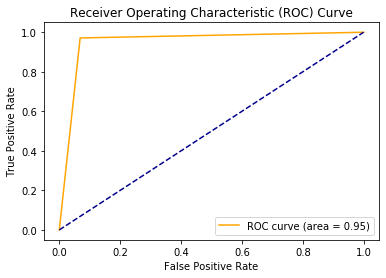

-------------------------------------------------------------------------------------------------------
                       NAME  accuracy_train  accuracy_test  precision  Recall  \
0       LOGISTIC REGRESSION            0.88           0.88       0.88    0.90   
1                       KNN            0.95           0.93       0.89    1.00   
2              NAVIES BAYES            0.53           0.53       0.52    1.00   
3     DECISION TREE ENTROPY            1.00           0.94       0.94    0.95   
4        DECISION TREE GINI            1.00           0.94       0.94    0.95   
5             RANDOM FOREST            1.00           0.96       0.96    0.97   
6        BAGGING CLASSIFIER            1.00           0.96       0.95    0.97   
7       ADABOOST CLASSIFIER            0.93           0.93       0.93    0.94   
8  GRADIENTBOOST CLASSIFIER            0.95           0.95       0.93    0.97   

   roc_ac  f1-score  
0    0.88      0.89  
1    0.93      0.94  
2    0.53      0.68

cross validation scores

ACCURACY SCORE: LR : 0.9402797513551062
BIAS ERROR OF LR : 0.05972024864489378
VARIANCE ERROR OF LR : 1.5548709752061064e-06
CV Score : Mean - 0.9402798 | Std - 0.001115301 | Min - 0.9386282 | Max - 0.941508
------------------------------------------------------------------------------------------------------------

ACCURACY SCORE: KNN : 0.9754364589772736
BIAS ERROR OF KNN : 0.0245635410227264
VARIANCE ERROR OF KNN : 4.3225593872709735e-06
CV Score : Mean - 0.9754365 | Std - 0.001859583 | Min - 0.9726573 | Max - 0.9781959
------------------------------------------------------------------------------------------------------------

ACCURACY SCORE: CART1 : 0.9461566967577273
BIAS ERROR OF CART1 : 0.05384330324227271
VARIANCE ERROR OF CART1 : 9.62838505732135e-06
CV Score : Mean - 0.9461567 | Std - 0.002775375 | Min - 0.9426177 | Max - 0.9497213
------------------------------------------------------------------------------------------------------------

ACCURACY S

In [41]:
model_results(X,y)

# CHOOSING BEST MODEL AFTER RANDOM OVER SAMPLING: RANDOM FOREST CLASSIFIER

# RANDOM FOREST MODEL HAS GOOD GENERALIZATION INTERMS OF TRAIN AND TEST ACCURACY

In [42]:
rf=RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
y_pred=rf.predict(X_Test)

In [44]:
#METRICS
print("accuracy:",accuracy_score(y_Test,y_pred),"\n")
#precision
print("precision :",precision_score(y_Test,y_pred),"\n")
#Recall
print("Recall :",recall_score(y_Test,y_pred),"\n")
print("f1 score:",f1_score(y_Test,y_pred),"\n")
#roc_auc score
print("roc_auc_score",roc_auc_score(y_Test,y_pred),"\n")

accuracy: 0.928693462818092 

precision : 0.4992272024729521 

Recall : 0.4078282828282828 

f1 score: 0.4489228630993745 

roc_auc_score 0.688230144899474 



# Final Model

# Light GBM model without Balancing 

In [45]:
def modelfit(model,X,y,predictors,performCV=True, printFeatureImportance=True, cv_folds=5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    #Fit the algorithm on the data
    model.fit(X_train,y_train)
    
    #Predict training set:
    y_pred = model.predict(X_test)
    #dtrain_predprob = model.predict_proba(X_test)[:,1]
    
    print("accuracy train:",model.score(X_train,y_train),"\n")
    #test
    print("accuracy test:",model.score(X_test,y_test),"\n")
    #precision
    print("precision :",precision_score(y_test,y_pred),"\n")
    #Recall
    print("Recall :",recall_score(y_test,y_pred),"\n")
    #f1 score
    print("f1 score:",f1_score(y_test,y_pred),"\n")
    #roc_auc score
    print("roc_auc_score",roc_auc_score(y_test,y_pred),"\n")
    #CONFUSION MATRIX
    fig,ax= plt.subplots()
    fig.set_size_inches(4, 4)
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap = 'RdBu_r')
    bottom, top = ax.get_ylim()
    ax.set_xlabel("predicted")
    ax.set_ylabel("Actual")
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.show()
    #roc auc curve
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    plot_roc_curve(fpr, tpr,roc_auc)
    print("-------------------------------------------------------------------------------------------------------")
    
    #Perform cross-validation:
    if performCV:
        kf  = model_selection.KFold(shuffle=True,n_splits=5,random_state=0)
        cv_results =model_selection.cross_val_score(model,X,y,cv=kf,scoring='roc_auc')
        
    if performCV:
        print('BIAS ERROR :',1-np.mean(cv_results))
        print('VARIANCE ERROR OF :',np.var(cv_results,ddof=1))
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_results),np.std(cv_results),np.min(cv_results),np.max(cv_results)))
    
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(model.feature_importances_, predictors).sort_values(ascending=False)
        fig,ax= plt.subplots()
        fig.set_size_inches(11.7, 8.27)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')    

In [46]:
sc=StandardScaler()
X=df_final_1.drop('y',axis=1)
X=pd.DataFrame(sc.fit_transform(X.values),columns=X.columns,index=X.index)
y=df_final_1['y']

accuracy train: 0.961268691228611 

accuracy test: 0.9343584210053053 

precision : 0.5612648221343873 

Recall : 0.35858585858585856 

f1 score: 0.43759630200308164 

roc_auc_score 0.668546487236583 



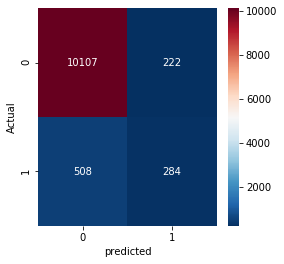

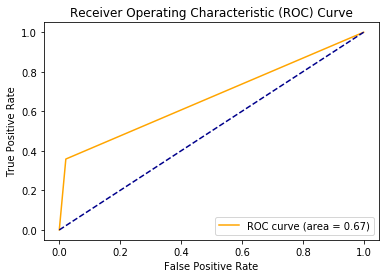

-------------------------------------------------------------------------------------------------------
BIAS ERROR : 0.051496957352799355
VARIANCE ERROR OF : 4.054290343683448e-06
CV Score : Mean - 0.948503 | Std - 0.001800953 | Min - 0.9463134 | Max - 0.9505121


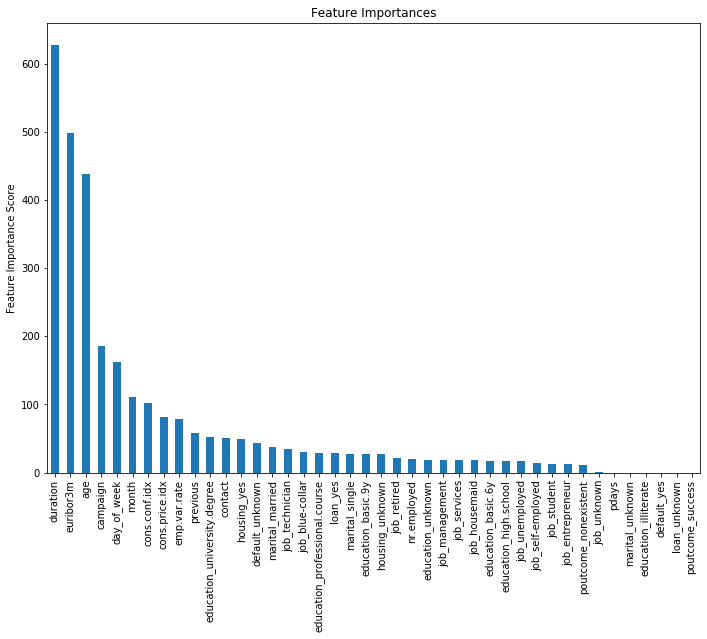

In [47]:
model = lgb.LGBMClassifier(random_state=42)
predictors=X.columns
modelfit(model,X,y,predictors)

# Here we need to Reduce the Type ii error i.e we need to reduce the False negative value lets us see what happens after balancing 

# after balancing using scale_pos_weight parameter

In [48]:
sc=StandardScaler()
X=df_final_1.drop('y',axis=1)
X=pd.DataFrame(sc.fit_transform(X.values),columns=X.columns,index=X.index)
y=df_final_1['y']

In [49]:
number_of_positive_samples=df_final_1.y.value_counts()[1]#4640
total_samples=df.shape[0]#41188

In [50]:
scale_pos_weight = 100 - ( number_of_positive_samples / total_samples  * 100 )
scale_pos_weight

93.653491308148

accuracy train: 0.8587174348697395 

accuracy test: 0.8455174894344034 

precision : 0.30627615062761504 

Recall : 0.9242424242424242 

f1 score: 0.4600879949717159 

roc_auc_score 0.8818617484751671 



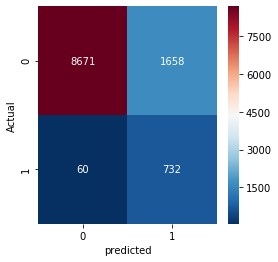

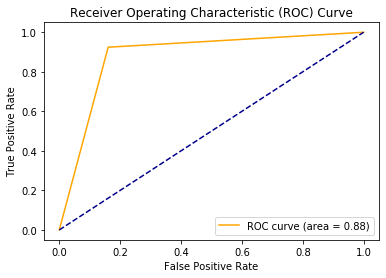

-------------------------------------------------------------------------------------------------------
BIAS ERROR : 0.05516720269140607
VARIANCE ERROR OF : 8.527244661073654e-06
CV Score : Mean - 0.9448328 | Std - 0.002611857 | Min - 0.9404154 | Max - 0.9472781


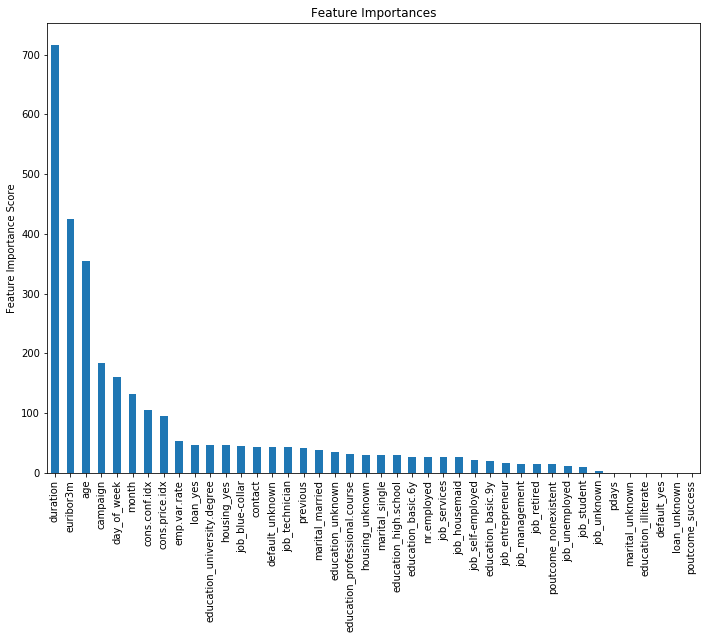

In [51]:
model = lgb.LGBMClassifier(scale_pos_weight=scale_pos_weight,objective='binary',random_state=42)
predictors=X.columns
modelfit(model,X,y,predictors)

# after balancing using class_weight parameter

In [52]:
sc=StandardScaler()
X=df_final_1.drop('y',axis=1)
X=pd.DataFrame(sc.fit_transform(X.values),columns=X.columns,index=X.index)
y=df_final_1['y']

accuracy train: 0.9035763835363034 

accuracy test: 0.8839133171477385 

precision : 0.3659322944653412 

Recall : 0.8598484848484849 

f1 score: 0.5133810780248775 

roc_auc_score 0.8728035143769969 



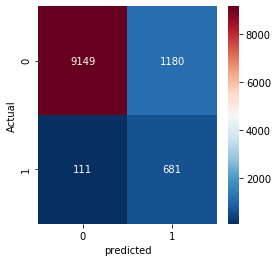

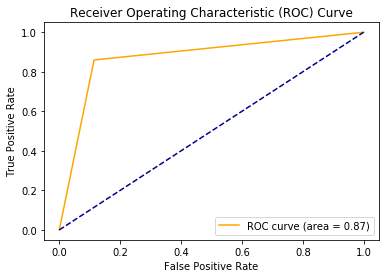

-------------------------------------------------------------------------------------------------------
BIAS ERROR : 0.051848716231002734
VARIANCE ERROR OF : 3.74299910945538e-06
CV Score : Mean - 0.9481513 | Std - 0.001730433 | Min - 0.9457038 | Max - 0.9501982


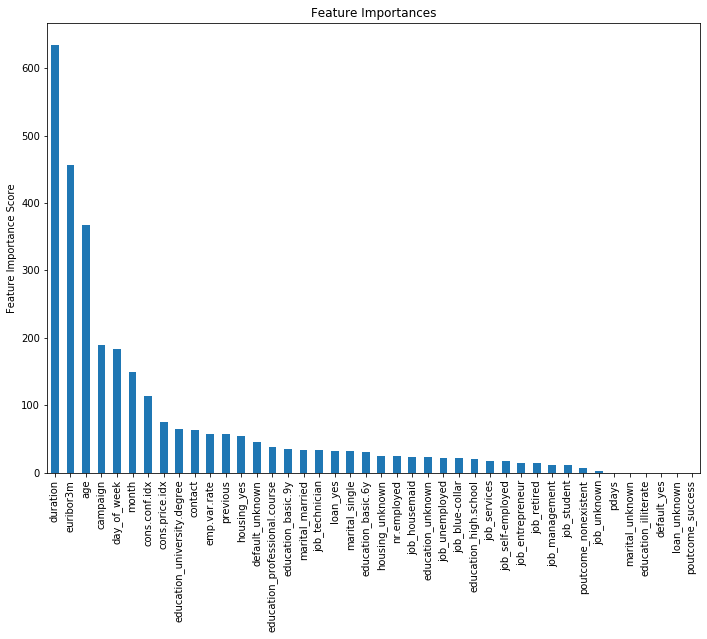

In [53]:
model = lgb.LGBMClassifier(class_weight='balanced',objective='binary',random_state=42)
predictors=X.columns
modelfit(model,X,y,predictors)

## precision -Recall tradeoff is better with the class_weight parameter, hence we will continue with the class_weight parameter

# using hyper parameter tuning 

In [54]:
sc=StandardScaler()
X=df_final_1.drop('y',axis=1)
X=pd.DataFrame(sc.fit_transform(X.values),columns=X.columns,index=X.index)
y=df_final_1['y']

accuracy train: 0.9035763835363034 

accuracy test: 0.8839133171477385 

precision : 0.3659322944653412 

Recall : 0.8598484848484849 

f1 score: 0.5133810780248775 

roc_auc_score 0.8728035143769969 



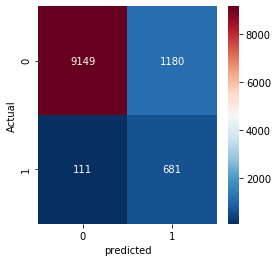

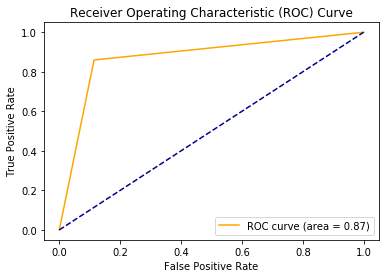

-------------------------------------------------------------------------------------------------------
BIAS ERROR : 0.051848716231002734
VARIANCE ERROR OF : 3.74299910945538e-06
CV Score : Mean - 0.9481513 | Std - 0.001730433 | Min - 0.9457038 | Max - 0.9501982


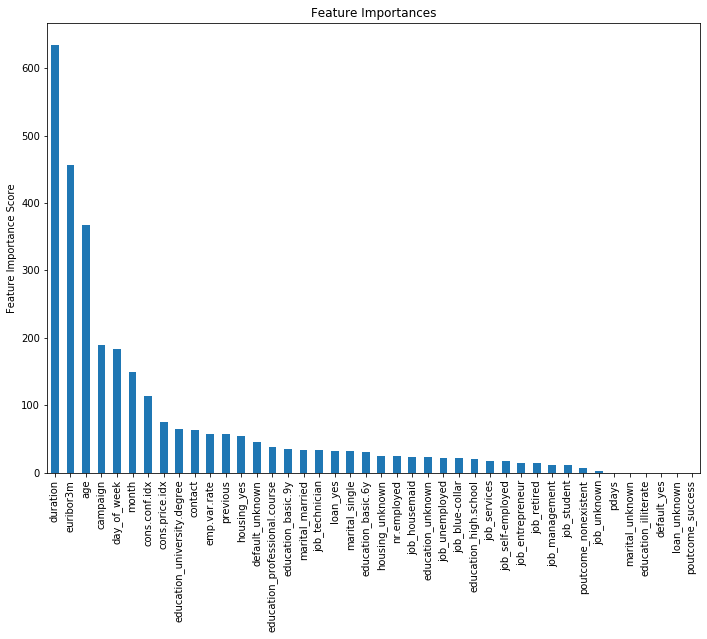

In [55]:
gbm0 = lgb.LGBMClassifier(class_weight='balanced',objective='binary',random_state=42,
                          learning_rate=0.01,n_estimators=700,max_depth=15,min_split_gain=0)
predictors=X.columns
modelfit(model,X,y,predictors)

### hyper parameter tuning doesnt change much, hence we will fix with following parameter
### (class_weight='balanced',objective='binary',random_state=42)

# now using feature selection using VIF 

# FUNCTION FOR REMOVING COLUMN WITH VIF VALUE >=5

In [56]:
def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True
            print(maxloc)

    print('Remaining variables:')
    print(X.columns[variables])

In [57]:
continuous_attributes=['age','duration','campaign','pdays','emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed',]

In [58]:
df_num=df_final_1[continuous_attributes]
df_num.head()

age  duration  campaign  pdays  emp.var.rate  cons.price.idx  \
0   56       261         1    999           1.1          93.994   
1   57       149         1    999           1.1          93.994   
2   37       226         1    999           1.1          93.994   
3   40       151         1    999           1.1          93.994   
4   56       307         1    999           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  
0          -36.4      4.857       5191.0  
1          -36.4      4.857       5191.0  
2          -36.4      4.857       5191.0  
3          -36.4      4.857       5191.0  
4          -36.4      4.857       5191.0

In [59]:
calculate_vif_(df_num,thresh=5.0)

dropping 'nr.employed' at index: 8
8
dropping 'cons.price.idx' at index: 5
5
dropping 'pdays' at index: 3
3
dropping 'euribor3m' at index: 5
5
dropping 'cons.conf.idx' at index: 4
4
Remaining variables:
Index(['age', 'duration', 'campaign', 'emp.var.rate'], dtype='object')


# MODEL BUILDING AFTER REMOVING REDUNDANT COLUMNS

In [60]:
X=df_final.drop(['nr.employed', 'cons.price.idx', 'euribor3m', 'cons.conf.idx'],axis=1)
y=df_final['y']

accuracy train: 1.0 

accuracy test: 1.0 

precision : 1.0 

Recall : 1.0 

f1 score: 1.0 

roc_auc_score 1.0 



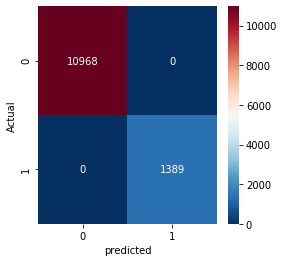

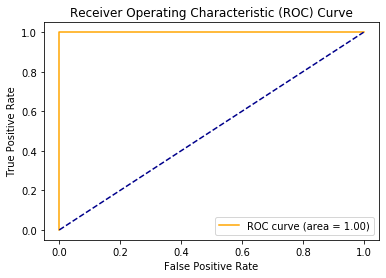

-------------------------------------------------------------------------------------------------------
BIAS ERROR : 0.0
VARIANCE ERROR OF : 3.0814879110195774e-33
CV Score : Mean - 1 | Std - 4.965068e-17 | Min - 1 | Max - 1


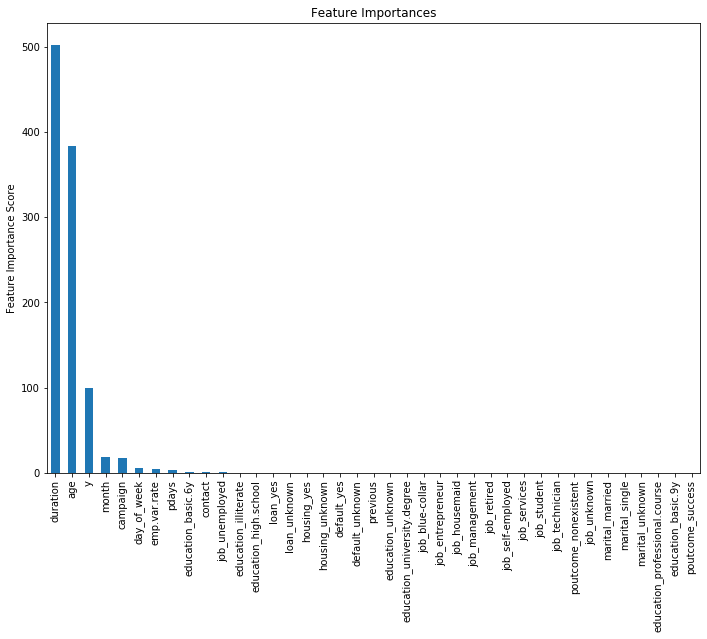

In [61]:
model = lgb.LGBMClassifier(class_weight='balanced',objective='binary',random_state=42)
predictors=X.columns
modelfit(model,X,y,predictors)

# AFTER REMOVING REDUNDANT COLUMNS USING VIF NOW THE LIGHT GRADIENT BOOST MODEL HAS GOT GOOD RECALL,PRECISION,ROC_AUC SCORE